In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
cleaned_data = pd.read_csv('../data/cleaned_movies.csv')

In [26]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 33 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   original_title                         1143 non-null   object 
 1   popularity                             1143 non-null   float64
 2   title                                  1143 non-null   object 
 3   vote_average                           1143 non-null   float64
 4   vote_count                             1143 non-null   int64  
 5   budget                                 1143 non-null   int64  
 6   imdb_id                                1143 non-null   object 
 7   production_companies                   1143 non-null   object 
 8   runtime                                1143 non-null   int64  
 9   domestic_opening                       1143 non-null   float64
 10  asia_pacific_opening                   1143 non-null   float64
 11  euro

In [27]:
cleaned_data.head()

,original_title,popularity,title,vote_average,vote_count,budget,imdb_id,production_companies,runtime,domestic_opening,...,genre_Music,genre_Mystery,genre_Romance,genre_Science_Fiction,genre_Thriller,genre_War,genre_Western,domestic,international,worldwide
0,Venom: The Last Dance,3197.278,Venom: The Last Dance,6.500,759,120000000,tt16366836,"Columbia Pictures, Pascal Pictures, Matt Tolma...",109,51012404.0,...,False,False,False,True,False,False,False,128094490.0,308500000.0,4.365945e+08
1,Terrifier 3,2204.248,Terrifier 3,6.925,1012,2000000,tt27911000,"Cineverse, Bloody Disgusting, Dark Age Cinema,...",125,18928113.0,...,False,True,False,False,True,False,False,53981071.0,31395883.0,8.537695e+07
2,The Wild Robot,1868.856,The Wild Robot,8.500,2899,78000000,tt29623480,DreamWorks Animation,102,35790150.0,...,False,False,False,True,False,False,False,137913995.0,171143000.0,3.090570e+08
3,Deadpool & Wolverine,1490.952,Deadpool & Wolverine,7.700,5465,200000000,tt6263850,"Marvel Studios, Maximum Effort, 21 Laps Entert...",128,211435291.0,...,False,False,False,True,False,False,False,636745858.0,701154969.0,1.337901e+09
4,The Substance,1356.547,The Substance,7.273,2048,17500000,tt17526714,"Working Title Films, Blacksmith",141,3205212.0,...,False,False,False,True,False,False,False,16235191.0,35228181.0,5.146337e+07


In [28]:
cleaned_data.shape, cleaned_data.dtypes

((1143, 33),
 original_title                            object
 popularity                               float64
 title                                     object
 vote_average                             float64
 vote_count                                 int64
 budget                                     int64
 imdb_id                                   object
 production_companies                      object
 runtime                                    int64
 domestic_opening                         float64
 asia_pacific_opening                     float64
 europe_middle_east_and_africa_opening    float64
 years_from_release                         int64
 genre_Action                                bool
 genre_Adventure                             bool
 genre_Animation                             bool
 genre_Comedy                                bool
 genre_Crime                                 bool
 genre_Drama                                 bool
 genre_Family                        

In [29]:
numerical_data = cleaned_data.select_dtypes(include=[np.number, np.bool_])
numerical_data.head()

,popularity,vote_average,vote_count,budget,runtime,domestic_opening,asia_pacific_opening,europe_middle_east_and_africa_opening,years_from_release,genre_Action,...,genre_Music,genre_Mystery,genre_Romance,genre_Science_Fiction,genre_Thriller,genre_War,genre_Western,domestic,international,worldwide
0,3197.278,6.500,759,120000000,109,51012404.0,12669884.0,27725511.0,0,True,...,False,False,False,True,False,False,False,128094490.0,308500000.0,4.365945e+08
1,2204.248,6.925,1012,2000000,125,18928113.0,1201876.0,10667946.0,0,False,...,False,True,False,False,True,False,False,53981071.0,31395883.0,8.537695e+07
2,1868.856,8.500,2899,78000000,102,35790150.0,4513231.0,16983417.0,0,False,...,False,False,False,True,False,False,False,137913995.0,171143000.0,3.090570e+08
3,1490.952,7.700,5465,200000000,128,211435291.0,54693311.0,76771204.0,0,True,...,False,False,False,True,False,False,False,636745858.0,701154969.0,1.337901e+09
4,1356.547,7.273,2048,17500000,141,3205212.0,871771.0,4017172.0,0,False,...,False,False,False,True,False,False,False,16235191.0,35228181.0,5.146337e+07


In [30]:
numerical_data.describe()

,popularity,vote_average,vote_count,budget,runtime,domestic_opening,asia_pacific_opening,europe_middle_east_and_africa_opening,years_from_release,domestic,international,worldwide
count,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1.143000e+03,1.143000e+03,1.143000e+03,1143.000000,1.143000e+03,1.143000e+03,1.143000e+03
mean,74.574574,6.664070,4219.285214,6.615426e+07,112.438320,2.402092e+07,8.302317e+06,1.196578e+07,10.071741,7.758550e+07,1.156652e+08,1.933612e+08
std,163.122517,0.702589,3502.983959,6.212612e+07,19.777648,2.724588e+07,1.260426e+07,1.579188e+07,7.297657,8.524035e+07,1.540667e+08,2.297594e+08
min,15.491000,4.046000,12.000000,5.000000e+00,76.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,8.370000e+02,5.536900e+04,1.097060e+05
25%,31.929500,6.200000,1755.500000,2.000000e+07,98.000000,7.469597e+06,9.054680e+05,2.427040e+06,3.000000,2.412065e+07,2.361814e+07,5.161389e+07
50%,43.447000,6.674000,3304.000000,4.500000e+07,109.000000,1.705721e+07,3.515803e+06,7.229650e+06,10.000000,5.473186e+07,6.414088e+07,1.239714e+08
75%,67.474500,7.168000,5752.500000,1.000000e+08,123.000000,3.149717e+07,9.991159e+06,1.550329e+07,16.000000,1.047313e+08,1.474673e+08,2.504980e+08
max,3197.278000,8.500000,25585.000000,4.600000e+08,206.000000,3.571150e+08,1.623613e+08,2.003668e+08,37.000000,8.583730e+08,1.941066e+09,2.799439e+09


<Axes: >

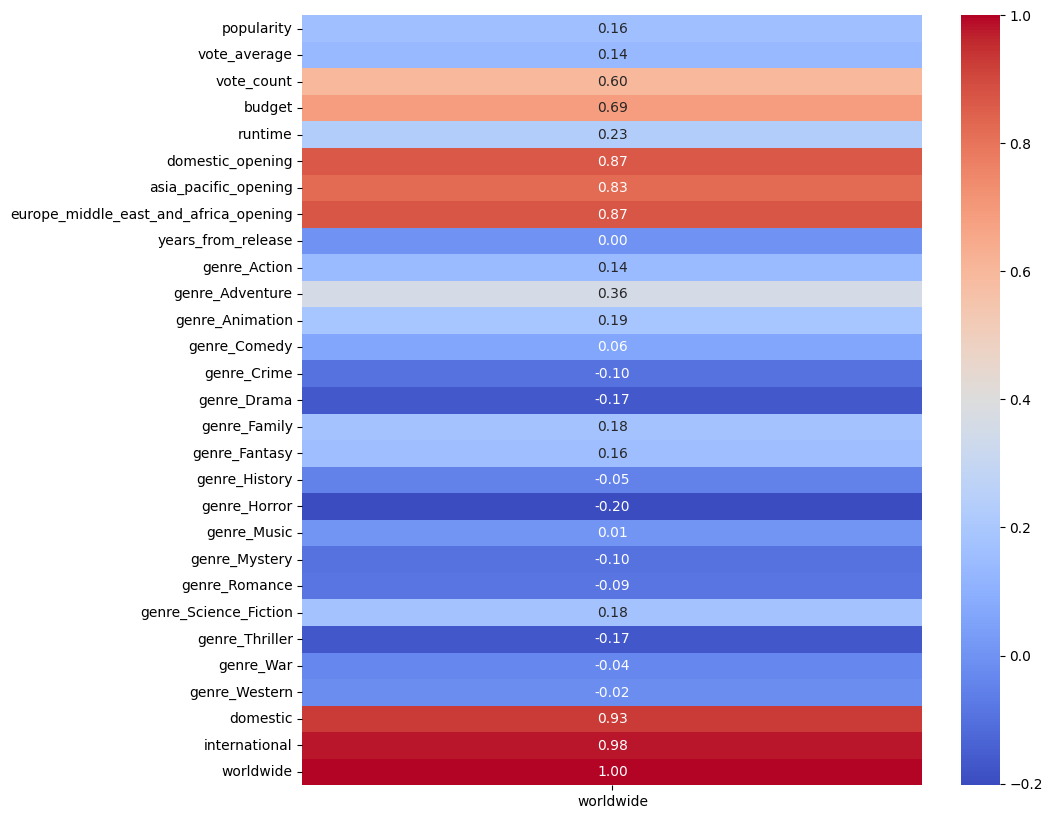

In [31]:
plt.figure(figsize=(10, 10))
sns.heatmap(numerical_data.corr(method ='pearson')['worldwide'].to_frame(), annot=True, cmap='coolwarm', fmt='.2f')

In [54]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
numerical_data_scaled = scaler.fit_transform(cleaned_data.select_dtypes(include=[np.number]))

# Perform PCA
pca = PCA(n_components=3)  # You can change the number of components
principal_components = pca.fit_transform(numerical_data_scaled)

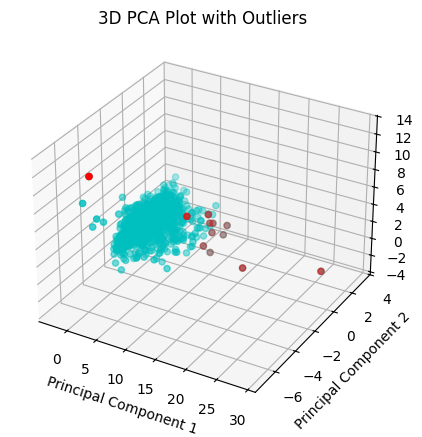

In [64]:
from mpl_toolkits.mplot3d import Axes3D

# Create a new figure for the 3D plot
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')

# Plot the PCA components
ax.scatter(principal_components[:, 0], principal_components[:, 1], principal_components[:, 2], c='c', marker='o')

# Highlight outliers (you can define your own criteria for outliers)
outliers = (principal_components[:, 0] > 10) | (principal_components[:, 1] > 10) | (principal_components[:, 2] > 10)
ax.scatter(principal_components[outliers, 0], principal_components[outliers, 1], principal_components[outliers, 2], c='r', marker='o')

# Set labels
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.zaxis.labelpad=-0.8
ax.set_title('3D PCA Plot with Outliers')

plt.show()

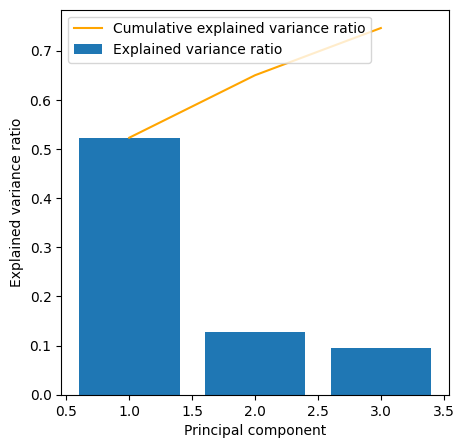

In [56]:
explained_variance_ratio = pca.explained_variance_ratio_
#matplotlib inline
plt.figure(figsize=(5, 5))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, label='Explained variance ratio')
plt.plot(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), label='Cumulative explained variance ratio', color='orange')
plt.xlabel('Principal component')
plt.ylabel('Explained variance ratio')
plt.legend()
plt.show()